In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import seaborn as sns
%matplotlib inline
font_path = "C:/Windows/Fonts/malgun.ttf"  
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)



# x는 구역 y는 앞바다 먼바다 중간바다
def wind(x):
    data = pd.read_excel('./data/combined_unique.xlsx')
    filtered_data = data[(data['region'] == x)]
    wind_speed_columns = ['풍속(㎧)', '평균풍속(㎧)']
    monthly_avg_wind_speed = filtered_data.groupby(['month', 'station_na'])[wind_speed_columns].mean().unstack()
    legend_labels = monthly_avg_wind_speed.columns[monthly_avg_wind_speed.notna().any()].tolist()
    label2 = [label[1] for label in legend_labels]
    custom_colors = ['red', 'purple', 'blue', 'skyblue', 'green', 'lime', 'yellow']
    palette = sns.color_palette(custom_colors, n_colors=len(label2))
    # 시각화
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(legend_labels):
        monthly_avg_wind_speed[label].plot(marker='o', color=palette[i], label=label[1])
    plt.xlabel('월')
    plt.ylabel('평균풍속')
    plt.legend(label2, title='지점명', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()


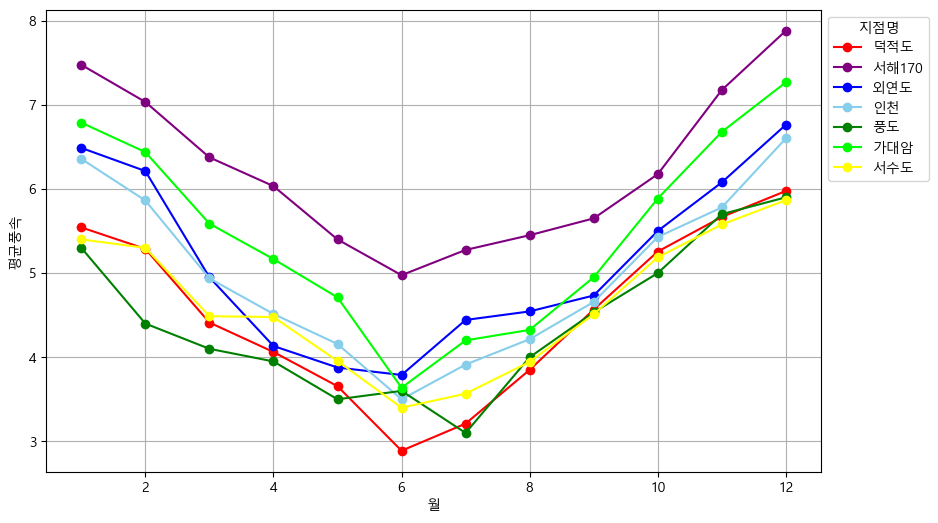

In [3]:
wind(1)